### Reading binary files from Incompact3d using NumPy fromfile function

development file, use extract_field.ipynb for final clean version

In [13]:
import numpy as np

**Ux component**

In [55]:
ux = np.fromfile("../Incompact3d/examples/Taylor-Green-Vortex/data/ux-001.bin")

In [3]:
ux

array([0.        , 0.15502693, 0.28898958, ..., 0.32725447, 0.17148604,
       0.        ])

In [4]:
ux.shape

(274625,)

In [57]:
ux = ux.reshape(65,65,65)
ux.shape

(65, 65, 65)

**Uy & Uz components**

In [56]:
uy = np.fromfile("../Incompact3d/examples/Taylor-Green-Vortex/data/uy-004.bin")
uz = np.fromfile("../Incompact3d/examples/Taylor-Green-Vortex/data/uz-004.bin")

In [58]:
uy = uy.reshape(65,65,65)
uz = uy.reshape(65,65,65)

In [8]:
uy.shape

(65, 65, 65)

In [9]:
uz.shape

(65, 65, 65)

### Plot data

In [14]:
%matplotlib widget
import matplotlib.pyplot as plt

**Create mesh grid for X & Y**

In [60]:
x = np.linspace(0,3.14159265358979,65)
y = np.linspace(0,3.14159265358979,65)
z = np.linspace(0,3.14159265358979,65)
X,Y = np.meshgrid(x,y,indexing='ij')

**Calculate Velocity Magnitude of ux & uy components (if you want to plot this**

In [61]:
Uxy = np.sqrt(ux**2 + uy**2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
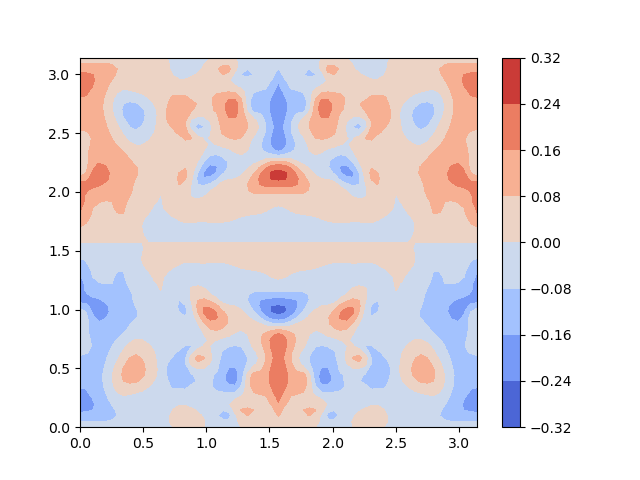

In [62]:
fig = plt.figure()
plt.contourf(X,Y,uy[:,:,32], cmap='coolwarm')
plt.colorbar()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
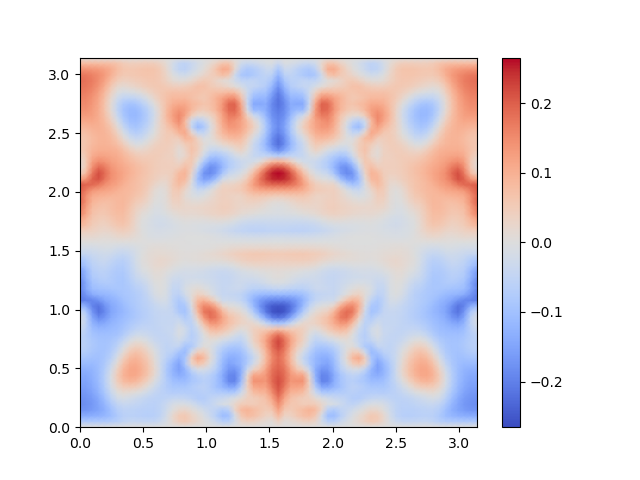

In [63]:
fig = plt.figure()
plt.pcolormesh(X,Y,uy[:,:,32], cmap='coolwarm', shading='gouraud')
plt.colorbar()

Looks similar to data in Paraview!

<img src="./paraview_comparison.PNG"  alt="drawing" width="500">

### Add all timesteps to u variables

Set mesh parameters

In [46]:
nx = 65
ny = 65
nz = 65
num_t = 4

In [47]:
ux = np.empty((nx,ny,nz,num_t))
uy = np.empty((nx,ny,nz,num_t))
uz = np.empty((nx,ny,nz,num_t))
ux.shape

(65, 65, 65, 4)

### Read all data at once

In [48]:
for i in range(0,4):
    idx = i+1
    ux_read = np.fromfile(f"../Incompact3d/examples/Taylor-Green-Vortex/data/ux-00{idx}.bin")
    uy_read = np.fromfile(f"../Incompact3d/examples/Taylor-Green-Vortex/data/uy-00{idx}.bin")
    uz_read = np.fromfile(f"../Incompact3d/examples/Taylor-Green-Vortex/data/uz-00{idx}.bin")
    
    ux_reshape = ux_read.reshape(65,65,65)
    uy_reshape = uy_read.reshape(65,65,65)
    uz_reshape = uz_read.reshape(65,65,65)

    ux[:,:,:,i] = ux_reshape
    uy[:,:,:,i] = uy_reshape
    uz[:,:,:,i] = uz_reshape
    
    print(i)
#ux = ux.reshape(65,65,65,4)

0
1
2
3


In [110]:
ux.shape

(65, 65, 65, 4)

In [51]:
uz[:,:,:,3]

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.10967856,  0.10998191,  0.11010085, ...,  0.01082617,
          0.06862362,  0.10967856],
        [ 0.06862362,  0.06960549,  0.07214926, ...,  0.0123715 ,
          0.06960549,  0.10998191],
        [ 0.01082617,  0.0123715 ,  0.01655247, ...,  0.01655247,
          0.07214926,  0.11010085],
        ...,
        [ 0.11010085,  0.07214926,  0.01655247, ...,  

# Dev

In [154]:
a = np.linspace(1,64,64)
a

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [155]:
a.shape

(64,)

In [157]:
a_new = a.reshape(2,4,8)
a_new.shape

(2, 4, 8)

In [159]:
a_new2 = a_new.transpose()
a_new2.shape

(8, 4, 2)

In [160]:
# Enter the mesh size parameters
nx = 128
ny = 65
nz = 64
num_t = 6

x_len = 8.
y_len = 2.
z_len = 4.

In [161]:
# Initialize velocity data matrices
ux = np.empty((nx,ny,nz,num_t))
uy = np.empty((nx,ny,nz,num_t))
uz = np.empty((nx,ny,nz,num_t))

In [3]:
import glob
import os
X3D_UX_FILES = glob.glob(os.path.join("../Incompact3d/examples/Channel-Flow/data/ux*"))
X3D_UY_FILES = glob.glob(os.path.join("../Incompact3d/examples/Channel-Flow/data/uy*"))
X3D_UZ_FILES = glob.glob(os.path.join("../Incompact3d/examples/Channel-Flow/data/uz*"))

In [164]:
X3D_UX_FILES[0]

'../Incompact3d/examples/Channel-Flow/data\\ux-001.bin'

In [165]:
# Extract data from files
for i in range(0,num_t):
    ux_read = np.fromfile(X3D_UX_FILES[i])
    uy_read = np.fromfile(X3D_UY_FILES[i])
    uz_read = np.fromfile(X3D_UZ_FILES[i])

    ux_reshape = ux_read.reshape(nz,ny,nx).transpose()
    uy_reshape = uy_read.reshape(nz,ny,nx).transpose()
    uz_reshape = uz_read.reshape(nz,ny,nx).transpose()

    ux[:,:,:,i] = ux_reshape
    uy[:,:,:,i] = uy_reshape
    uz[:,:,:,i] = uz_reshape

# Paraview reader

In [3]:
import paraview
from paraview.simple import XDMFReader

In [4]:
file = XDMFReader(FileNames=[r'../Incompact3d/examples/Channel-Flow/data/snapshot-001.xdmf'])

In [5]:
file

In [11]:
file.GetCellDataInformation()

In [9]:
GetCellDataInformation(file)

NameError: name 'GetCellDataInformation' is not defined

# XML

In [18]:
from xml.etree import ElementTree as ET

In [30]:
tree = ET.parse('../Incompact3d/examples/Channel-Flow/data/snapshot-001.xdmf')
tree

In [29]:
root = tree.getroot()
root

<Element 'Xdmf' at 0x7f7247845530>

In [31]:
root.tag

'Xdmf'

In [32]:
for child in root:
    print(child.tag, child.attrib)

Domain {}


In [33]:
child.tag

'Domain'

In [42]:
child

<Element 'Domain' at 0x7f7247845710>

In [49]:
for DataItem in root.iter('DataItem'):
    print(DataItem.attrib)

{'Dimensions': '         128 ', 'NumberType': 'Float', 'Precision': '4', 'Format': 'XML'}
{'Dimensions': '          65 ', 'NumberType': 'Float', 'Precision': '4', 'Format': 'XML'}
{'Dimensions': '          64 ', 'NumberType': 'Float', 'Precision': '4', 'Format': 'XML'}
{'Format': 'Binary', 'DataType': 'Float', 'Precision': '8', 'Endian': 'little', 'Seek': '0', 'Dimensions': '          64          65         128 '}
{'Format': 'Binary', 'DataType': 'Float', 'Precision': '8', 'Endian': 'little', 'Seek': '0', 'Dimensions': '          64          65         128 '}
{'Format': 'Binary', 'DataType': 'Float', 'Precision': '8', 'Endian': 'little', 'Seek': '0', 'Dimensions': '          64          65         128 '}
{'Format': 'Binary', 'DataType': 'Float', 'Precision': '8', 'Endian': 'little', 'Seek': '0', 'Dimensions': '          64          65         128 '}
{'Format': 'Binary', 'DataType': 'Float', 'Precision': '8', 'Endian': 'little', 'Seek': '0', 'Dimensions': '          64          65      

In [53]:
for Geometry in root.iter('Geometry'):
    print(Geometry.attrib)

{'name': 'geo', 'Type': 'VXVYVZ'}
{'Reference': '/Xdmf/Domain/Geometry[1]'}


In [52]:
for Geometry in root.findall('Geometry'):
    rank = Geometry.find('DataItem').text
    print(rank)

In [56]:
root.iter('DataItem')

In [60]:
DataItem.attrib

{'Format': 'Binary',
 'DataType': 'Float',
 'Precision': '8',
 'Endian': 'little',
 'Seek': '0',
 'Dimensions': '          64          65         128 '}

In [78]:
root.findall("./Xdmf/Domain/Geometry/DataItem[1]")

[]

# BeautifulSoup

In [79]:
from bs4 import BeautifulSoup

In [80]:
with open('../Incompact3d/examples/Channel-Flow/data/snapshot-001.xdmf', 'r') as f:
    data = f.read()

In [83]:
Bs_data = BeautifulSoup(data, "xml")

In [86]:
b_data = Bs_data.find_all('DataItem')
b_data[0]

<DataItem Dimensions="         128 " Format="XML" NumberType="Float" Precision="4">
            0.0000000000000000        6.2500000000000000E-002  0.12500000000000000       0.18750000000000000       0.25000000000000000       0.31250000000000000       0.37500000000000000       0.43750000000000000       0.50000000000000000       0.56250000000000000       0.62500000000000000       0.68750000000000000       0.75000000000000000       0.81250000000000000       0.87500000000000000       0.93750000000000000        1.0000000000000000        1.0625000000000000        1.1250000000000000        1.1875000000000000        1.2500000000000000        1.3125000000000000        1.3750000000000000        1.4375000000000000        1.5000000000000000        1.5625000000000000        1.6250000000000000        1.6875000000000000        1.7500000000000000        1.8125000000000000        1.8750000000000000        1.9375000000000000        2.0000000000000000        2.0625000000000000        2.1250000000000000  

In [99]:
b_geo = Bs_data.find('Geometry', {'name':'geo'})
b_geo

<Geometry Type="VXVYVZ" name="geo">
<DataItem Dimensions="         128 " Format="XML" NumberType="Float" Precision="4">
            0.0000000000000000        6.2500000000000000E-002  0.12500000000000000       0.18750000000000000       0.25000000000000000       0.31250000000000000       0.37500000000000000       0.43750000000000000       0.50000000000000000       0.56250000000000000       0.62500000000000000       0.68750000000000000       0.75000000000000000       0.81250000000000000       0.87500000000000000       0.93750000000000000        1.0000000000000000        1.0625000000000000        1.1250000000000000        1.1875000000000000        1.2500000000000000        1.3125000000000000        1.3750000000000000        1.4375000000000000        1.5000000000000000        1.5625000000000000        1.6250000000000000        1.6875000000000000        1.7500000000000000        1.8125000000000000        1.8750000000000000        1.9375000000000000        2.0000000000000000        2.06250000

In [103]:
b_dim = b_geo.find('DataItem')
b_dim

<DataItem Dimensions="         128 " Format="XML" NumberType="Float" Precision="4">
            0.0000000000000000        6.2500000000000000E-002  0.12500000000000000       0.18750000000000000       0.25000000000000000       0.31250000000000000       0.37500000000000000       0.43750000000000000       0.50000000000000000       0.56250000000000000       0.62500000000000000       0.68750000000000000       0.75000000000000000       0.81250000000000000       0.87500000000000000       0.93750000000000000        1.0000000000000000        1.0625000000000000        1.1250000000000000        1.1875000000000000        1.2500000000000000        1.3125000000000000        1.3750000000000000        1.4375000000000000        1.5000000000000000        1.5625000000000000        1.6250000000000000        1.6875000000000000        1.7500000000000000        1.8125000000000000        1.8750000000000000        1.9375000000000000        2.0000000000000000        2.0625000000000000        2.1250000000000000  

In [105]:
value = b_dim.get('Dimensions')
value

'         128 '

In [106]:
b_geo = Bs_data.find('Geometry')
b_geo

<Geometry Type="VXVYVZ" name="geo">
<DataItem Dimensions="         128 " Format="XML" NumberType="Float" Precision="4">
            0.0000000000000000        6.2500000000000000E-002  0.12500000000000000       0.18750000000000000       0.25000000000000000       0.31250000000000000       0.37500000000000000       0.43750000000000000       0.50000000000000000       0.56250000000000000       0.62500000000000000       0.68750000000000000       0.75000000000000000       0.81250000000000000       0.87500000000000000       0.93750000000000000        1.0000000000000000        1.0625000000000000        1.1250000000000000        1.1875000000000000        1.2500000000000000        1.3125000000000000        1.3750000000000000        1.4375000000000000        1.5000000000000000        1.5625000000000000        1.6250000000000000        1.6875000000000000        1.7500000000000000        1.8125000000000000        1.8750000000000000        1.9375000000000000        2.0000000000000000        2.06250000

In [107]:
value = b_geo.get('Dimensions')
value

# XML to JSON

In [110]:
import json
import xmltodict

In [111]:
with open("../Incompact3d/examples/Channel-Flow/data/snapshot-001.xdmf") as xml_file:
    data_dict = xmltodict.parse(xml_file.read())

In [113]:
xml_file.close()

In [123]:
data_dict.keys()

dict_keys(['Xdmf'])

In [163]:
x_read = data_dict['Xdmf']['Domain']['Geometry']['DataItem'][0]['#text']
y_read = data_dict['Xdmf']['Domain']['Geometry']['DataItem'][1]['#text']
z_read = data_dict['Xdmf']['Domain']['Geometry']['DataItem'][2]['#text']

In [186]:
x = np.array(x_read.split(),dtype=float)
y = np.array(y_read.split())
z = np.array(z_read.split())


In [187]:
x.dtype

dtype('float64')

In [165]:
y.shape

(65,)

In [167]:
z.shape

(64,)

In [168]:
X,Y,Z = np.meshgrid(x,y,z,indexing='ij')

In [174]:
X[:,:,0].shape

(128, 65)

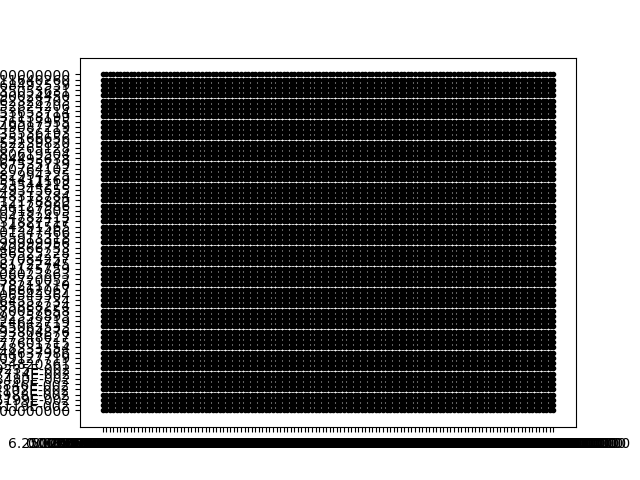

In [175]:
fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
plt.plot(X[:,:,0].flat, Y[:,:,0].flat, ".k")

Get mesh length of each axis

In [184]:
nx = int(data_dict['Xdmf']['Domain']['Geometry']['DataItem'][0]['@Dimensions'])
ny = int(data_dict['Xdmf']['Domain']['Geometry']['DataItem'][1]['@Dimensions'])
nz = int(data_dict['Xdmf']['Domain']['Geometry']['DataItem'][2]['@Dimensions'])

64